# 聚类

In [1]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [4]:
raw_data = np.loadtxt('./datacode_for_book/chapter4/cluster.txt')
x = raw_data[:,:-1]
y_true = raw_data[:,-1]
x[:5]
y_true[:5]

array([[ 0.58057881,  0.43199283],
       [ 1.70562094,  1.16006288],
       [ 0.8016818 , -0.51336891],
       [-0.15328359, -1.64435136],
       [ 0.70765057, -1.65668129]])

array([0., 0., 2., 1., 2.])

In [5]:
n_clusters = 3
model_kmeans = KMeans(n_clusters=n_clusters,random_state=0)
model_kmeans.fit(x)
y_predict = model_kmeans.predict(x)
y_predict[:5]

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

array([1, 1, 2, 0, 2])

In [16]:
#模型效果评估
n_samples,n_features = x.shape
inertias = model_kmeans.inertia_  # 样本距离最近的聚类中心的总和
inertias
adjusted_rand_s = metrics.adjusted_rand_score(y_true, y_predict)  # 调整后的兰德指数
adjusted_rand_s
mutual_info_s = metrics.mutual_info_score(y_true, y_predict)  # 互信息
mutual_info_s
adjusted_mutual_info_s = metrics.adjusted_mutual_info_score(y_true, y_predict)  # 调整后的互信息
adjusted_mutual_info_s
homogeneity_s = metrics.homogeneity_score(y_true, y_predict)  # 同质化得分
homogeneity_s
completeness_s = metrics.completeness_score(y_true, y_predict)  # 完整性得分
completeness_s
v_measure_s = metrics.v_measure_score(y_true, y_predict)  # V-measure得分
v_measure_s
silhouette_s = metrics.silhouette_score(x, y_predict, metric='euclidean')  # 平均轮廓系数
silhouette_s
calinski_harabaz_s = metrics.calinski_harabaz_score(x, y_predict)  # Calinski和Harabaz得分
calinski_harabaz_s

300.1262936093466

0.9642890803276076

1.0310595406681184

f:\ProgramData\Anaconda3\envs\normal\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


0.938399249349474

0.9385116928897981

0.9385372785555511

0.938524485548298

0.6342086134083013

2860.8215946947635

In [17]:
print ('samples: %d \t features: %d' % (n_samples, n_features))  # 打印输出样本量和特征数量
print (70 * '-')  # 打印分隔线
print ('ine\tARI\tMI\tAMI\thomo\tcomp\tv_m\tsilh\tc&h')  # 打印输出指标标题
print ('%d\t%.2f\t%.2f\t%.2f\t%.2f\t%.2f\t%.2f\t%.2f\t%d' % (
inertias, adjusted_rand_s, mutual_info_s, adjusted_mutual_info_s, homogeneity_s, completeness_s, v_measure_s,
silhouette_s, calinski_harabaz_s))  # 打印输出指标值
print (70 * '-')  # 打印分隔线
print ('short name \t full name')  # 打印输出缩写和全名标题
print ('ine \t inertias')
print ('ARI \t adjusted_rand_s')
print ('MI \t mutual_info_s')
print ('AMI \t adjusted_mutual_info_s')
print ('homo \t homogeneity_s')
print ('comp \t completeness_s')
print ('v_m \t v_measure_s')
print ('silh \t silhouette_s')
print ('c&h \t calinski_harabaz_s')

samples: 1000 	 features: 2
----------------------------------------------------------------------
ine	ARI	MI	AMI	homo	comp	v_m	silh	c&h
300	0.96	1.03	0.94	0.94	0.94	0.94	0.63	2860
----------------------------------------------------------------------
short name 	 full name
ine 	 inertias
ARI 	 adjusted_rand_s
MI 	 mutual_info_s
AMI 	 adjusted_mutual_info_s
homo 	 homogeneity_s
comp 	 completeness_s
v_m 	 v_measure_s
silh 	 silhouette_s
c&h 	 calinski_harabaz_s


<Figure size 1152x576 with 0 Axes>

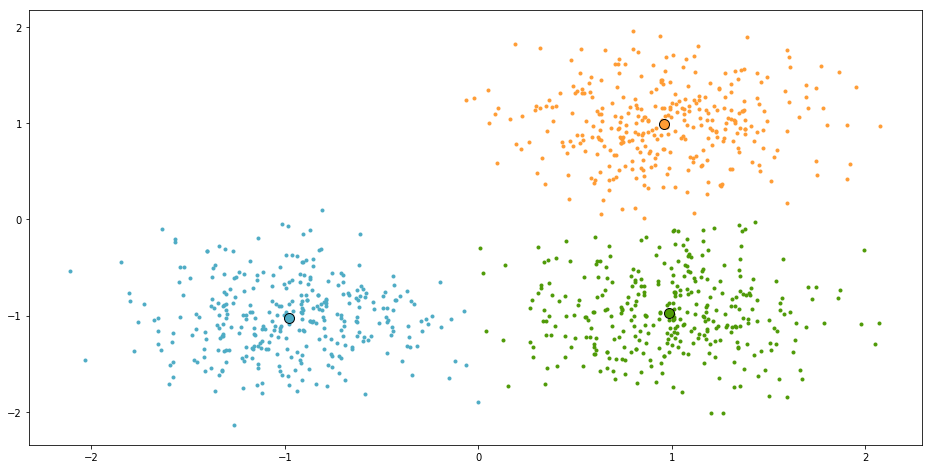

In [21]:
# 模型效果可视化
centers = model_kmeans.cluster_centers_  # 各类别中心
colors = ['#4EACC5', '#FF9C34', '#4E9A06']  # 设置不同类别的颜色
plt.figure(figsize=(16,8))  # 建立画布
for i in range(n_clusters):  # 循环读类别
    index_sets = np.where(y_predict == i)  # 找到相同类的索引集合
    cluster = x[index_sets]  # 将相同类的数据划分为一个聚类子集
    plt.scatter(cluster[:, 0], cluster[:, 1], c=colors[i], marker='.')  # 展示聚类子集内的样本点
    plt.plot(centers[i][0], centers[i][1], 'o', markerfacecolor=colors[i], markeredgecolor='k',
             markersize=10)  # 展示各聚类子集的中心
plt.show()  # 展示图像

In [22]:
# 模型应用
new_X = [1, 3.6]
cluster_label = model_kmeans.predict(np.array(new_X).reshape(1,-1))
print ('cluster of new data point is: %d' % cluster_label)

cluster of new data point is: 1


In [25]:
#保存模型
import pickle
pickle.dump(model_kmeans,open('./kmeans_model.model','wb'))
pickle.load(open('./kmeans_model.model','rb'))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

# 线性回归

In [3]:
from sklearn.linear_model import BayesianRidge, LinearRegression, ElasticNet  # 批量导入要实现的回归算法
from sklearn.svm import SVR  # SVM中的回归算法
# from sklearn.ensemble.gradient_boosting import GradientBoostingRegressor  # 集成算法
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score  # 交叉检验
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score  # 批量导入指标算法

In [6]:
# 数据准备
raw_data = np.loadtxt('./datacode_for_book/chapter4/regression.txt')  # 读取数据文件
X = raw_data[:, :-1]  # 分割自变量
y = raw_data[:, -1]  # 分割因变量
X[:3]
y[:3]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00]])

array([24. , 21.6, 34.7])

<Figure size 720x360 with 0 Axes>

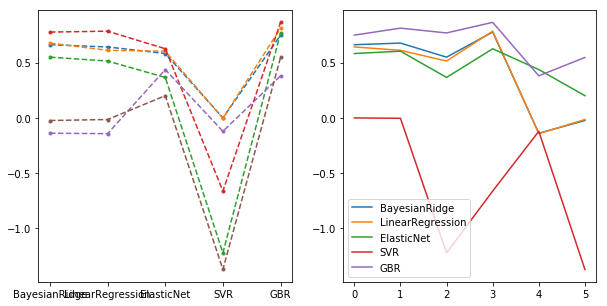

In [19]:
# 训练回归模型
n_folds = 6  # 设置交叉检验的次数
model_br = BayesianRidge()  # 建立贝叶斯岭回归模型对象
model_lr = LinearRegression()  # 建立普通线性回归模型对象
model_etc = ElasticNet()  # 建立弹性网络回归模型对象
model_svr = SVR(gamma='auto')  # 建立支持向量机回归模型对象
model_gbr = GradientBoostingRegressor()  # 建立梯度增强回归模型对象
model_names = ['BayesianRidge', 'LinearRegression', 'ElasticNet', 'SVR', 'GBR']  # 不同模型的名称列表
model_dic = [model_br, model_lr, model_etc, model_svr, model_gbr]  # 不同回归模型对象的集合
cv_score_list = []  # 交叉检验结果列表
pre_y_list = []  # 各个回归模型预测的y值列表
for model in model_dic:  # 读出每个回归模型对象
    scores = cross_val_score(model, X, y, cv=n_folds)  # 将每个回归模型导入交叉检验模型中做训练检验
    cv_score_list.append(scores)  # 将交叉检验结果存入结果列表
    pre_y_list.append(model.fit(X, y).predict(X))  # 将回归训练中得到的预测y存入列表
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(model_names,cv_score_list,'.--')
plt.subplot(1,2,2)
for index,name in enumerate(model_names):
    plt.plot(list(range(n_folds)),cv_score_list[index],label=name)
plt.legend()